# Importing Required Libraries

In [290]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

import warnings 
warnings.filterwarnings('ignore')

# Reading Data-Set

In [291]:
df = pd.read_csv(r'C:\Users\win10\Downloads\archive (1)\CO2 Emissions.csv')

In [292]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


# Data Pre-Processing

In [293]:
df.shape

(7385, 12)

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [295]:
column_to_convert = 'Cylinders'  # Replace 'YourColumnName' with the actual column name

def custom_conversion(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return value

# Apply the custom conversion function to the specified column
df[column_to_convert] = df[column_to_convert].apply(custom_conversion)

# Example usage:
print(df.dtypes)

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                           float64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object


In [296]:
column_to_convert = 'Fuel Consumption Comb (mpg)'  # Replace 'YourColumnName' with the actual column name

def custom_conversion(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return value

# Apply the custom conversion function to the specified column
df[column_to_convert] = df[column_to_convert].apply(custom_conversion)

# Example usage:
print(df.dtypes)

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                           float64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)         float64
CO2 Emissions(g/km)                   int64
dtype: object


In [297]:
column_to_convert = 'CO2 Emissions(g/km)'  # Replace 'YourColumnName' with the actual column name

def custom_conversion(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return value

# Apply the custom conversion function to the specified column
df[column_to_convert] = df[column_to_convert].apply(custom_conversion)

# Example usage:
print(df.dtypes)

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                           float64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)         float64
CO2 Emissions(g/km)                 float64
dtype: object


In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   float64
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   float64
 11  CO2 Emissions(g/km)               7385 non-null   float64
dtypes: flo

In [299]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [300]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.9,6.7,8.5,33.0,196.0
1,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,11.2,7.7,9.6,29.0,221.0
2,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,Z,6.0,5.8,5.9,48.0,136.0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,Z,12.7,9.1,11.1,25.0,255.0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,Z,12.1,8.7,10.6,27.0,244.0


In [301]:
df.tail()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4.0,AS8,Z,10.7,7.7,9.4,30.0,219.0
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4.0,AS8,Z,11.2,8.3,9.9,29.0,232.0
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4.0,AS8,Z,11.7,8.6,10.3,27.0,240.0
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4.0,AS8,Z,11.2,8.3,9.9,29.0,232.0
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4.0,AS8,Z,12.2,8.7,10.7,26.0,248.0


In [302]:
df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.9,6.7,8.5,33.0,196.0
1,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,11.2,7.7,9.6,29.0,221.0
2,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,Z,6.0,5.8,5.9,48.0,136.0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,Z,12.7,9.1,11.1,25.0,255.0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,Z,12.1,8.7,10.6,27.0,244.0
5,ACURA,RLX,MID-SIZE,3.5,6.0,AS6,Z,11.9,7.7,10.0,28.0,230.0
6,ACURA,TL,MID-SIZE,3.5,6.0,AS6,Z,11.8,8.1,10.1,28.0,232.0
7,ACURA,TL AWD,MID-SIZE,3.7,6.0,AS6,Z,12.8,9.0,11.1,25.0,255.0
8,ACURA,TL AWD,MID-SIZE,3.7,6.0,M6,Z,13.4,9.5,11.6,24.0,267.0
9,ACURA,TSX,COMPACT,2.4,4.0,AS5,Z,10.6,7.5,9.2,31.0,212.0


# Data Wrangling

In [303]:
df.isnull()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,False,False,False,False,False,False,False,False,False,False,False,False
7381,False,False,False,False,False,False,False,False,False,False,False,False
7382,False,False,False,False,False,False,False,False,False,False,False,False
7383,False,False,False,False,False,False,False,False,False,False,False,False


In [304]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [305]:
df.nunique()

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

In [306]:
df.drop_duplicates(inplace = True)

In [307]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.9,6.7,8.5,33.0,196.0
1,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,11.2,7.7,9.6,29.0,221.0
2,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,Z,6.0,5.8,5.9,48.0,136.0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,Z,12.7,9.1,11.1,25.0,255.0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,Z,12.1,8.7,10.6,27.0,244.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4.0,AS8,Z,10.7,7.7,9.4,30.0,219.0
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4.0,AS8,Z,11.2,8.3,9.9,29.0,232.0
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4.0,AS8,Z,11.7,8.6,10.3,27.0,240.0
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4.0,AS8,Z,11.2,8.3,9.9,29.0,232.0


In [308]:
df = df.drop('Fuel Consumption City (L/100 km)', axis=1)

In [309]:
df = df.drop('Fuel Consumption Hwy (L/100 km)', axis=1)      

In [310]:
 df = df.drop('Fuel Consumption Comb (L/100 km)', axis=1)      

In [311]:
#df = df.drop('Transmission', axis=1)

In [312]:
#df = df.drop('Fuel Type', axis=1)      

In [313]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,27.411016,251.157752
std,1.365201,1.846250,7.245318,59.290426
min,0.900000,3.000000,11.000000,96.000000
25%,2.000000,4.000000,22.000000,208.000000
50%,3.000000,6.000000,27.000000,246.000000
75%,3.700000,6.000000,32.000000,289.000000
max,8.400000,16.000000,69.000000,522.000000


In [314]:
Q3=np.percentile(df.describe(),75)
Q1=np.percentile(df.describe(),25)
Q2=np.percentile(df.describe(),50)


IQR=Q3-Q1
print('Q2:',Q2)
print('Q3:',Q3)
print('Q1:',Q1)
print('IQR:',IQR)

Q2: 19.0
Q3: 217.5
Q1: 3.925
IQR: 213.575


In [315]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [316]:
upper_array = np.where(df.describe() >= upper)[0]
lower_array = np.where(df.describe() <= lower)[0]
 
# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", df.shape)

New Shape:  (6281, 9)


In [317]:
from scipy import stats
skew=stats.skew(df.describe())
print('skewness:',skew)

skewness: [2.26778192 2.26776969 2.26746232 2.24873566]


In [318]:
log_transformed_data = np.log(skew)

In [319]:
print('skewness:',log_transformed_data)

skewness: [0.81880222 0.81879683 0.81866128 0.81036813]


In [320]:
corre=stats.spearmanr(df.describe())

In [321]:
corre

SignificanceResult(statistic=array([[1.        , 0.93414848, 0.97619048, 0.97619048],
       [0.93414848, 1.        , 0.95810101, 0.95810101],
       [0.97619048, 0.95810101, 1.        , 1.        ],
       [0.97619048, 0.95810101, 1.        , 1.        ]]), pvalue=array([[0.00000000e+00, 6.79105745e-04, 3.31439603e-05, 3.31439603e-05],
       [6.79105745e-04, 2.73691106e-47, 1.78156773e-04, 1.78156773e-04],
       [3.31439603e-05, 1.78156773e-04, 0.00000000e+00, 0.00000000e+00],
       [3.31439603e-05, 1.78156773e-04, 0.00000000e+00, 0.00000000e+00]]))

In [322]:
corre  = df.describe().values.reshape((2, -1))

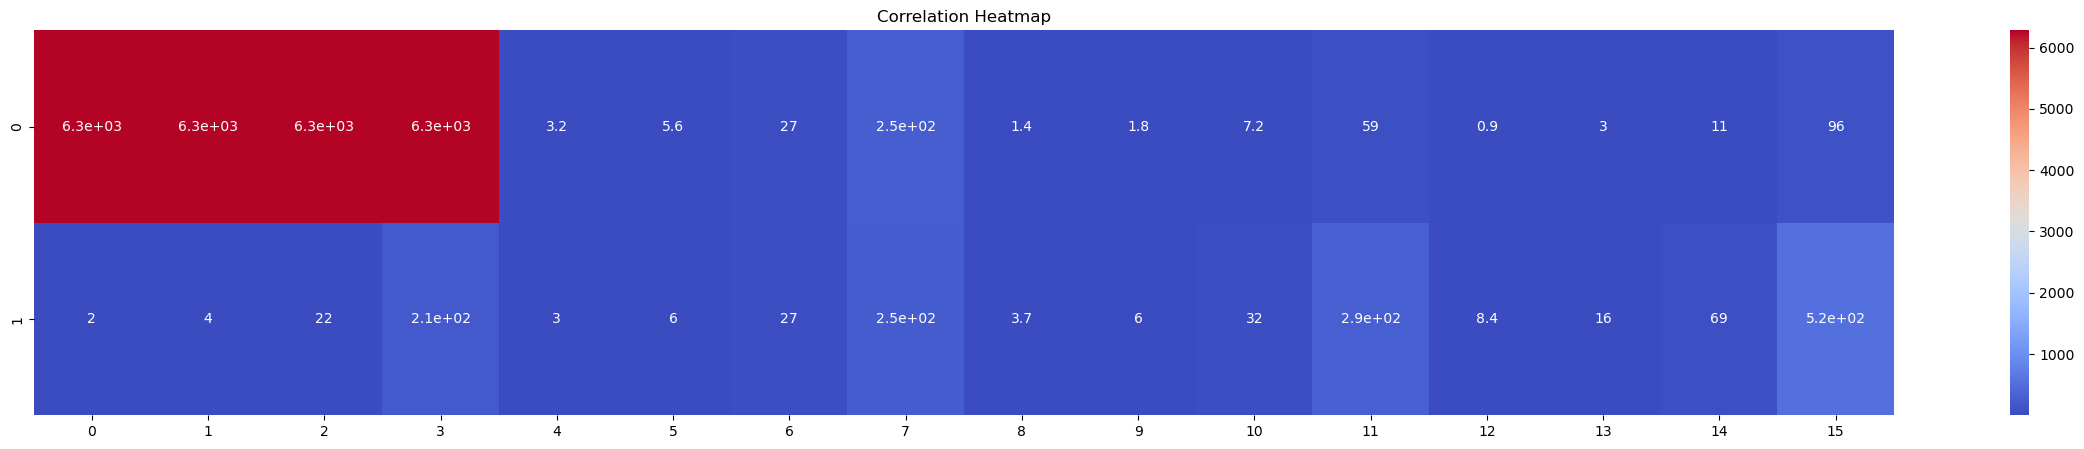

In [323]:
# Set up the matplotlib figure
plt.figure(figsize=(30, 5))

# Plot the heatmap
sns.heatmap(corre,annot=True,cmap="coolwarm") 

# Show the plot
plt.title("Correlation Heatmap")
plt.show()

# EDA-DISPLAYING All GRAPHS

In [324]:
df_subset=df[['Make','Cylinders','CO2 Emissions(g/km)']]

In [325]:
%matplotlib inline

Text(0.5, 1.0, "Histogram with pdf for feature 'CO2 Emissions(g/km)'")

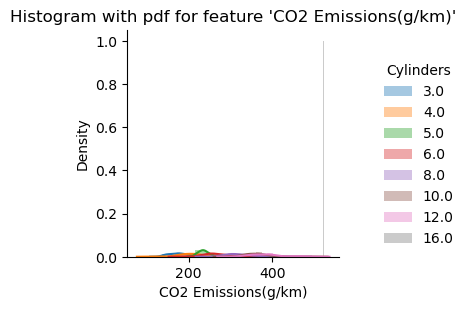

In [326]:
sns.FacetGrid(df_subset,hue='Cylinders').map(sns.distplot,'CO2 Emissions(g/km)').add_legend()
plt.title("Histogram with pdf for feature 'CO2 Emissions(g/km)'")

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Make'>

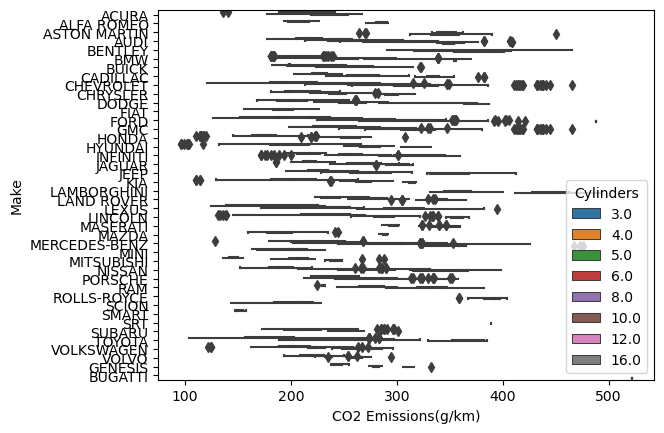

In [327]:
sns.boxplot(data=df_subset,x='CO2 Emissions(g/km)', y='Make',hue='Cylinders')

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Make'>

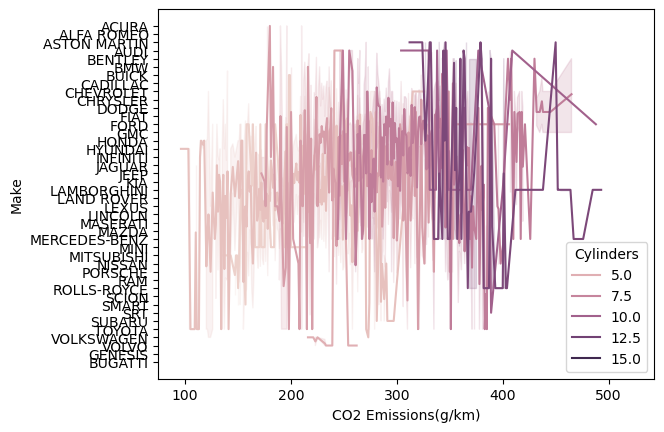

In [328]:
sns.lineplot(data=df_subset,x='CO2 Emissions(g/km)', y='Make',hue='Cylinders')

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Make'>

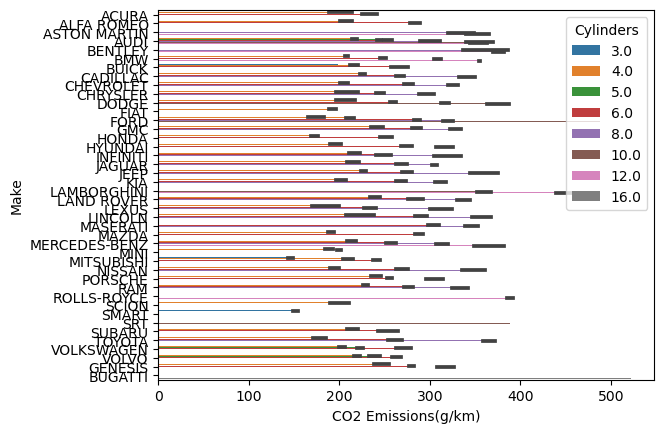

In [329]:
sns.barplot(data=df_subset,x='CO2 Emissions(g/km)', y='Make',hue='Cylinders')

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Make'>

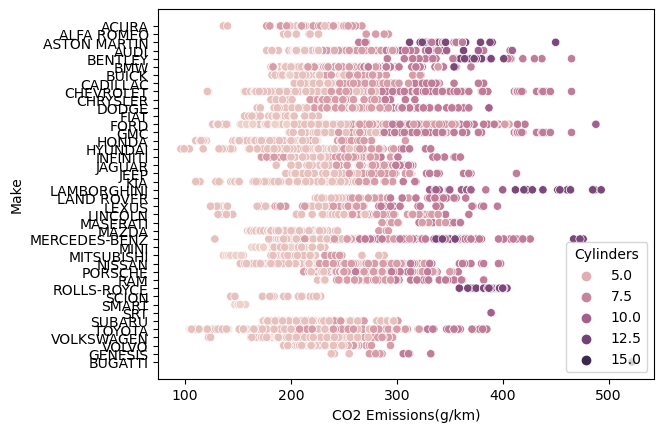

In [330]:
sns.scatterplot(data=df_subset,x='CO2 Emissions(g/km)', y='Make',hue='Cylinders')

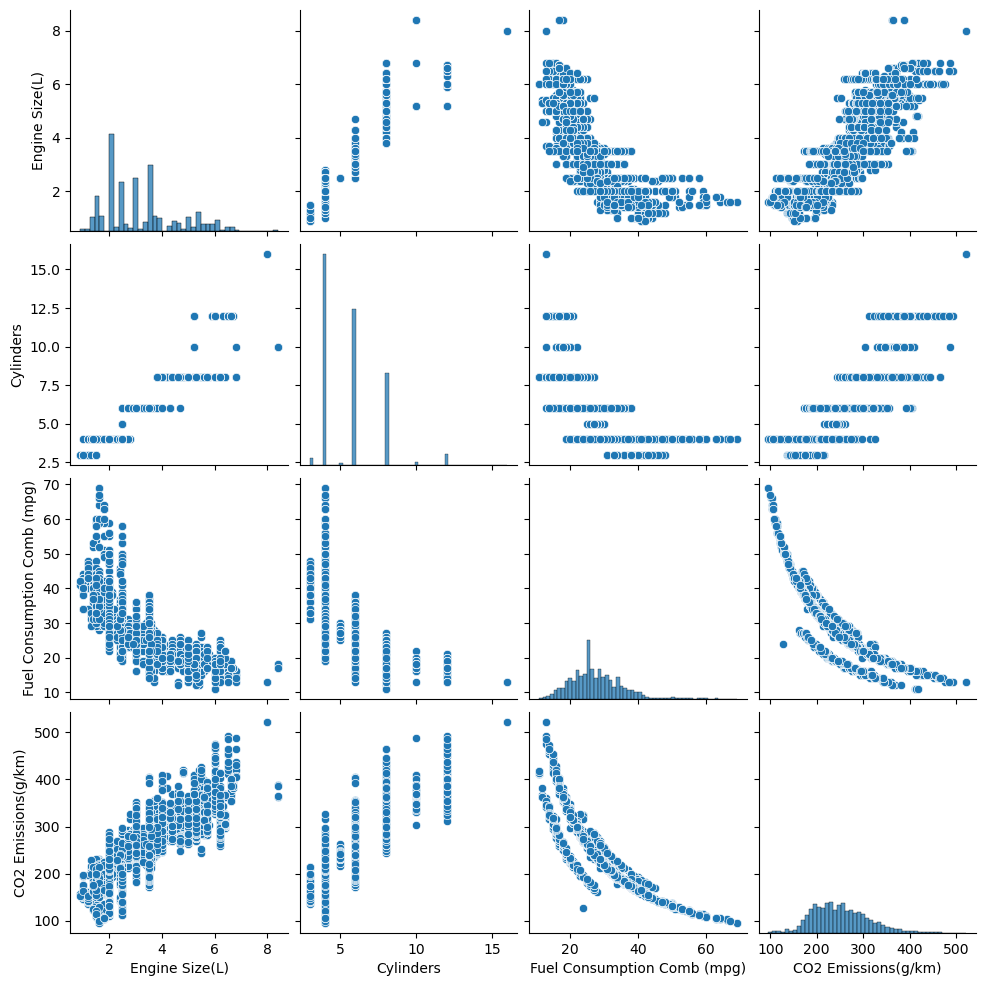

In [331]:
sns.pairplot(df)

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Make'>

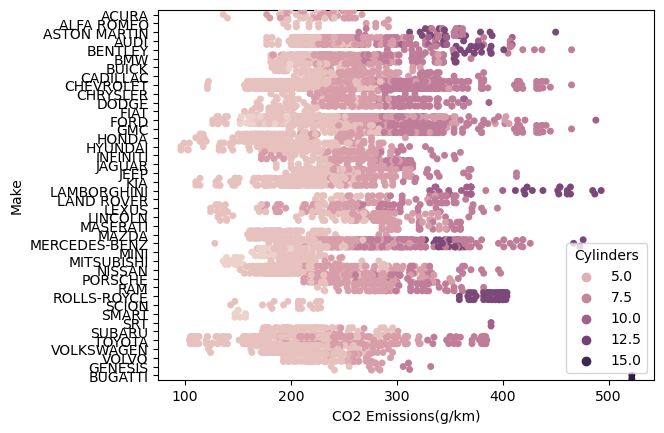

In [332]:
sns.swarmplot(x='CO2 Emissions(g/km)', y='Make',hue='Cylinders',data=df)

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Make'>

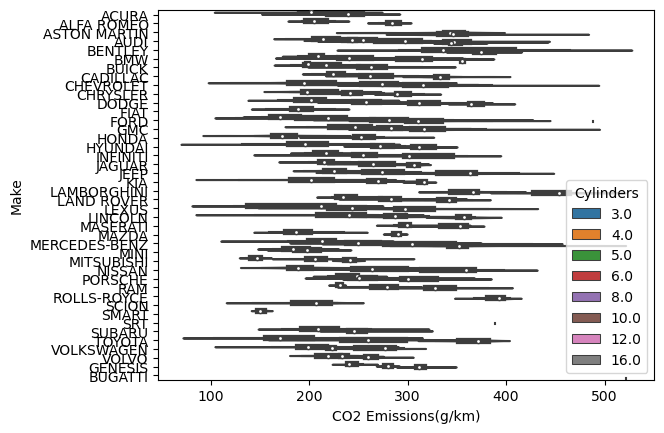

In [333]:
sns.violinplot(x='CO2 Emissions(g/km)', y='Make',hue='Cylinders',data=df)

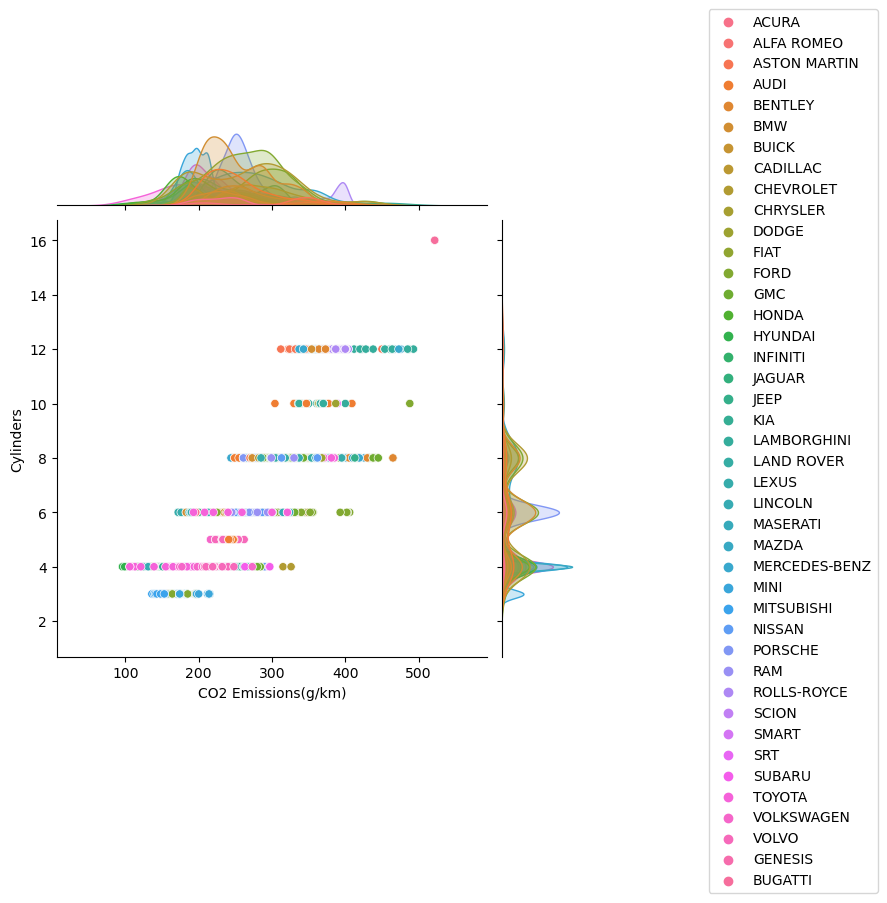

In [334]:
sns.jointplot(x='CO2 Emissions(g/km)', y='Cylinders',hue='Make',data=df);
plt.legend(loc='upper left', bbox_to_anchor=(1.5, 1.5))

# Model Development

In [335]:
df.dropna(inplace=True)

In [336]:
cat_cols=['Make','Model','Vehicle Class','Transmission','Fuel Type']
encoder=OneHotEncoder(drop='first',sparse=False)
encoded_cols=pd.DataFrame(encoder.fit_transform(df[cat_cols]),
                         columns=encoder.get_feature_names_out(cat_cols))

In [337]:
encoded_cols

,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,Make_BUGATTI,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [338]:
cat_cols1=['Engine Size(L)','Cylinders','Fuel Consumption Comb (mpg)']
scaler=StandardScaler()
scaler_cols=pd.DataFrame(scaler.fit_transform(df[cat_cols1]),
                         columns=scaler.get_feature_names_out(cat_cols1))

In [339]:
scaler_cols

,Engine Size(L),Cylinders,Fuel Consumption Comb (mpg)
0,-0.558189,-0.877058,0.219445
1,-1.217471,-0.877058,2.841953
2,0.247599,0.206285,-0.332662
3,0.247599,0.206285,-0.056608
4,0.247599,0.206285,0.081418
...,...,...,...
6276,-0.851203,-0.877058,0.357472
6277,-0.851203,-0.877058,0.219445
6278,-0.851203,-0.877058,-0.056608
6279,-0.851203,-0.877058,0.219445


In [340]:
x= pd.concat([scaler_cols,encoded_cols],axis=1)
y=df['CO2 Emissions(g/km)']

In [341]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=42)

# Linear Regression

In [342]:
lr_model=LinearRegression()

In [343]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [344]:
y_pred=lr_model.predict(x_test)

In [345]:
r2=r2_score(y_test,y_pred)
print("R2 Score:",r2)

R2 Score: -1.1120167693897726e+19


In [346]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation and calculate R2 scores
cv_scores = cross_val_score(lr_model, x, y, cv=5, scoring='r2')

# Display the cross-validated R2 scores
print("Cross-validated R2 scores:", cv_scores)
print("Mean R2 score:", np.mean(cv_scores))

Cross-validated R2 scores: [-2.20663687e+20 -2.50288927e+18 -1.14327335e+20 -4.26197037e+20
 -9.08207553e+19]
Mean R2 score: -1.709023407242286e+20


In [347]:
mae=mean_absolute_error(y_test,y_pred)
print("MAE:",mae)

MAE: 47195034737.178696


In [348]:
mse=mean_squared_error(y_test,y_pred)
print("MSE :",mse)

MSE : 3.973125756885998e+22


In [349]:
rmse=np.sqrt(mse)
print("RMSE:",rmse)

RMSE: 199327011638.8142


# Lasso Regression

In [350]:
lasso_model=Lasso()

In [351]:
lasso_model.fit(x_train,y_train)

Lasso()

In [352]:
y_pred=lasso_model.predict(x_test)

In [353]:
r2=r2_score(y_test,y_pred)
print("R2 Score: ",r2)

R2 Score:  0.9166710574190444


In [354]:
mae=mean_absolute_error(y_test,y_pred)
print("MAE:",mae)

MAE: 11.478661299685553


In [355]:
mse=mean_squared_error(y_test,y_pred)
print("MSE :",mse)

MSE : 297.72605699476077


In [356]:
rmse=np.sqrt(mse)
print("RMSE:",rmse)

RMSE: 17.254740131186004


# Ridge Regression

In [357]:
ridge_model=Ridge()

In [358]:
ridge_model.fit(x_train,y_train)

Ridge()

In [359]:
y_pred=ridge_model.predict(x_test)

In [360]:
r2=r2_score(y_test,y_pred)
print("R2 Score: ",r2)

R2 Score:  0.9756805107659964


In [361]:
mae=mean_absolute_error(y_test,y_pred)
print("MAE:",mae)

MAE: 6.094512714003107


In [362]:
mse=mean_squared_error(y_test,y_pred)
print("MSE :",mse)

MSE : 86.89112586220703


In [363]:
rmse=np.sqrt(mse)
print("RMSE:",rmse)

RMSE: 9.321540959637899


# ElasticNet

In [364]:
en_model=ElasticNet()

In [365]:
en_model.fit(x_train,y_train)

ElasticNet()

In [366]:
y_pred=en_model.predict(x_test)

In [367]:
r2=r2_score(y_test,y_pred)
print("R2 Score: ",r2)

R2 Score:  0.8643836412941022


In [368]:
mae=mean_absolute_error(y_test,y_pred)
print("MAE:",mae)

MAE: 15.776145250252721


In [369]:
mse=mean_squared_error(y_test,y_pred)
print("MSE :",mse)

MSE : 484.54381504082437


In [370]:
rmse=np.sqrt(mse)
print("RMSE:",rmse)

RMSE: 22.01235596297735


In [371]:
param_grid={'alpha':[0.1,1,10]}

In [372]:
grid_search=GridSearchCV(estimator=lasso_model,param_grid=param_grid,scoring='neg_mean_squared_error')
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(), param_grid={'alpha': [0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [373]:
print("Best Hyperparameters:",grid_search.best_params_)
print("Best Mean Squared Error:",-grid_search.best_score_)

Best Hyperparameters: {'alpha': 0.1}
Best Mean Squared Error: 185.95522399831935


In [374]:
param_grid={'fit_intercept':[True,False]}

In [375]:
grid_search=GridSearchCV(estimator=lr_model,param_grid=param_grid,
                         scoring='neg_mean_squared_error',cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [376]:
print("Best Hyperparameters:",grid_search.best_params_)
print("Best Mean Squared Error:",-grid_search.best_score_)

Best Hyperparameters: {'fit_intercept': False}
Best Mean Squared Error: 1.3562150545067479e+23


In [377]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint, uniform

# Assuming you have X_train, y_train for training and X_test, y_test for testing
# Replace this with your actual data

# Define the hyperparameter space
param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Create a random forest regressor model
rf_model = RandomForestRegressor()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    scoring='r2',  # Use R-squared as the scoring metric
    cv=5  # Number of cross-validation folds
)

# Fit the random search to the data
random_search.fit(x_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
test_r2 = best_model.score(x_test, y_test)
print("R-squared on Test Set:", test_r2)

Best Hyperparameters: {'bootstrap': False, 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 14, 'min_samples_split': 6, 'n_estimators': 112}
R-squared on Test Set: 0.9802602322642843
